In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Table 6.3. New Utility Scale Generating Units by Operating Company, Plant, and Month, 2020
#Table 6.4. Retired Utility Scale Generating Units by Operating Company, Plant, and Month, 2020

#available at:https://www.eia.gov/electricity/monthly/

In [3]:
newplant_list =  ["Table_6_03_Oct_2020_raw.xlsx",\
                  "Table_6_03_Feb_2020_raw.xlsx",\
                  "Table_6_03_Feb_2019_raw.xlsx",\
                  "Table_6_03_Feb_2018_raw.xlsx",\
                  "Table_6_03_Feb_2017_raw.xlsx",\
                  "Table_6_03_Feb_2016_raw.xlsx"]

In [4]:
example = pd.read_excel("Table_6_03_Feb_2020_raw.xlsx",skiprows=1)
example.head()

,Year,Month,Entity ID,Entity Name,Plant Producer Type,Plant Name,Plant State,Plant ID,Generator ID,\nNet Summer Capacity (MW),Technology,Energy Source Code,Prime Mover Code
0,2019,1.0,60571.0,AEP Onsite Partners,IPP,Trout Creek Solar,CO,62260.0,44901,2.0,Solar Photovoltaic,SUN,PV
1,2019,1.0,61482.0,"AES ES GILBERT, LLC",IPP,AES ES GILBERT,AZ,61861.0,SRP,10.0,Batteries,MWH,BA
2,2019,1.0,60281.0,"Altus Power America Management, LLC",IPP,Corcoran CSG,MN,61971.0,201,1.0,Solar Photovoltaic,SUN,PV
3,2019,1.0,60281.0,"Altus Power America Management, LLC",IPP,Corcoran CSG,MN,61971.0,202,1.0,Solar Photovoltaic,SUN,PV
4,2019,1.0,60281.0,"Altus Power America Management, LLC",IPP,Corcoran CSG,MN,61971.0,203,1.0,Solar Photovoltaic,SUN,PV


In [5]:
example['Technology'].unique()

array(['Solar Photovoltaic', 'Batteries', 'Onshore Wind Turbine',
       'Natural Gas Internal Combustion Engine', 'Petroleum Liquids',
       'Conventional Hydroelectric',
       'Natural Gas Fired Combustion Turbine',
       'Natural Gas Steam Turbine', 'Other Natural Gas',
       'Natural Gas Fired Combined Cycle', 'Landfill Gas',
       'Wood/Wood Waste Biomass', 'Other Waste Biomass', 'All Other', nan],
      dtype=object)

In [6]:
example['Energy Source Code'].unique()

array(['SUN', 'MWH', 'WND', 'NG', 'DFO', 'WAT', 'LFG', 'WDS', 'OBG', 'WH',
       'AB', nan], dtype=object)

Note: These are not all-encompassing lists of possible codes, these are just the codes corresponding to plant types 
in the example file.  For example, as no nuclear plants came online in 2019 (Feb 2020 file covers CY2019 data), no nuclear
plants are present in this file and associated Technology/code (Nuclear, NUC) are not in these example lists.  Also note that natural gas plants span three different technologies, but all three technologies have the same source code (NG).

In [41]:
shutdown_list =  ["Table_6_04_Oct_2020_raw.xlsx",\
                  "Table_6_04_Feb_2020_raw.xlsx",\
                  "Table_6_04_Feb_2019_raw.xlsx",\
                  "Table_6_04_Feb_2018_raw.xlsx",\
                  "Table_6_04_Feb_2017_raw.xlsx",\
                  "Table_6_04_Feb_2016_raw.xlsx"]

In [8]:
example2 = pd.read_excel("Table_6_04_Feb_2020_raw.xlsx",skiprows=1)
example2['Technology'].unique()

array(['Natural Gas Steam Turbine', 'Conventional Steam Coal',
       'Geothermal', 'Natural Gas Fired Combined Cycle',
       'Natural Gas Fired Combustion Turbine',
       'Natural Gas Internal Combustion Engine',
       'Wood/Wood Waste Biomass', 'Petroleum Liquids',
       'Municipal Solid Waste', 'Nuclear', 'Conventional Hydroelectric',
       'Other Waste Biomass', 'Landfill Gas', 'Solar Photovoltaic',
       'Petroleum Coke', 'Onshore Wind Turbine', nan], dtype=object)

In [9]:
###this function is to process numeric values encoded as string/objects in input files which may inclue space character

def obj_convert(x):
    try:
        y = float(x)
    except ValueError:
        y = np.nan
    return y

In [10]:
f1= lambda x: datetime(int(x['Year']), int(x['Month']),15)

In [11]:
def simple_process(file_list):
    
    col_names = ['Year','Month','Ent_ID','Owner','Owner_type','Plant Name','State','Plant_ID','Gen_ID','Capacity_MW',\
         'Technology','Energy Source Code','Prime Mover']
    
    use = ['Year','Month','Plant Name','State','Plant_ID','Gen_ID','Capacity_MW','Technology','Energy Source Code']
    
    load = pd.read_excel(file_list[0],skiprows=1,header=0, names=col_names,skipfooter=1)
    carry = load[use]
    del load
    carry['Date'] = carry.apply(f1,axis=1)
    carry['Capacity_MW'] = carry['Capacity_MW'].apply(obj_convert)
    
    for i in range(1, len(file_list)):
        load = pd.read_excel(file_list[i],skiprows=1,header=0, names=col_names,skipfooter=1)
        load = load[use]
        load['Date'] = load.apply(f1,axis=1)
        load['Capacity_MW'] = load['Capacity_MW'].apply(obj_convert)        
        carry = pd.concat([carry,load])
        del load

    return carry

In [12]:
test = simple_process(newplant_list)
allNG = test[test['Energy Source Code']=='NG']
allNG.head(5)

,Year,Month,Plant Name,State,Plant_ID,Gen_ID,Capacity_MW,Technology,Energy Source Code,Date
10,2020,1,Asheville,NC,2706,CT7,153.0,Natural Gas Fired Combined Cycle,NG,2020-01-15
13,2020,1,Hinds Energy Facility,MS,55218,H04BS,36.4,Natural Gas Fired Combustion Turbine,NG,2020-01-15
30,2020,1,Power Island,TX,10154,GEN2,50.0,Natural Gas Fired Combustion Turbine,NG,2020-01-15
54,2020,1,H Wilson Sundt Generating Station,AZ,126,RIC10,18.2,Natural Gas Internal Combustion Engine,NG,2020-01-15
55,2020,1,H Wilson Sundt Generating Station,AZ,126,RIC6,18.2,Natural Gas Internal Combustion Engine,NG,2020-01-15


In [13]:
allNG.groupby('Technology')['Capacity_MW'].sum()

Technology
Natural Gas Fired Combined Cycle          46557.9
Natural Gas Fired Combustion Turbine       9041.4
Natural Gas Internal Combustion Engine     1913.5
Natural Gas Steam Turbine                    87.7
Other Natural Gas                            32.5
Name: Capacity_MW, dtype: float64

In [14]:
#to get consolidated multi-year lists of new plants, it is necessary to group by for each individual year.  This is
#because a single plant may add new operating units in different years. Changes in operating units are the most
#appropriate way to evaluate "plant" changes.


def process_data_newplant(file_list, source_code):
    agg_dict = {'Date':"first",'State':"first",'Plant_ID':"first",'Capacity_MW':"sum", \
            'Technology':"first",'Energy Source Code':"first"}
    
    col_names = ['Year','Month','Ent_ID','Owner','Owner_type','Plant Name','State','Plant_ID','Gen_ID','Capacity_MW',\
         'Technology','Energy Source Code','Prime Mover']
    
    use = ['Year','Month','Plant Name','State','Plant_ID','Capacity_MW','Technology','Energy Source Code']
    
    f1= lambda x: datetime(int(x['Year']), int(x['Month']),15)
    
    init = pd.read_excel(file_list[0],skiprows=1,header=0, names=col_names)
    init = init[use]
    carry = init[init['Energy Source Code']==source_code].copy()
    del init   
    carry['Date'] = carry.apply(f1,axis=1)
    carry['Capacity_MW'] = carry['Capacity_MW'].apply(obj_convert)
    out = carry.groupby("Plant Name",as_index=False).agg(agg_dict)
    out1 = carry.groupby("Date",as_index=False)['Capacity_MW'].sum()
    for i in range(1, len(file_list)):
        load = pd.read_excel(file_list[i],skiprows=1,header=0, names=col_names)
        load = load[use]
        s_load = load[load['Energy Source Code']==source_code].copy()
        del load
        s_load['Date'] = s_load.apply(f1,axis=1)
        s_load['Capacity_MW'] = s_load['Capacity_MW'].apply(obj_convert)
        c_load = s_load.groupby("Plant Name",as_index=False).agg(agg_dict)
        c_load1 = s_load.groupby("Date",as_index=False)['Capacity_MW'].sum()
        out = pd.concat([out,c_load])
        out1 = pd.concat([out1,c_load1])
        del c_load, c_load1
    return out, out1

In [15]:
NG_new, NG_new_month = process_data_newplant(newplant_list, 'NG')

Note that there is a slight difference in the two NG dataframes.  This is because a single plant may contain more
than one type of unit.  However, this is typically only at large plants (multi-unit) which are dominated by
natural gas combined cycle.  This minor discrepancy is acceptable for the purposes of this evaluation (which is
only concerned with total natural plant capacity changes, it would be extremely difficult to resolve in the aggregation process.

In [16]:
NG_new.groupby('Technology')['Capacity_MW'].sum()

Technology
Natural Gas Fired Combined Cycle          46771.0
Natural Gas Fired Combustion Turbine       8830.8
Natural Gas Internal Combustion Engine     1912.0
Natural Gas Steam Turbine                    86.7
Other Natural Gas                            32.5
Name: Capacity_MW, dtype: float64

194 new natural gas plants have come online since the start of 2015.

In [17]:
NG_new['Energy Source Code'].value_counts()

NG    194
Name: Energy Source Code, dtype: int64

The large (utility scale) plants are Natural Gas Fired Combined Cycle type.  This is a highly efficient type of unit which 
includes both a gas fired combustion turbine (topping cycle) and a steam turbine (bottoming cycle).  Steam is created using
a heat recovery steam generator (HRSG) which is heated using the exhaust gases from the combustion turbine.  This plant
has higher theoretical carnot efficiency because of the larger difference in heat source and sink temperatures which can
be achieved by using two cycles together in a cascade.

In [18]:
#average size of each plant type.
NG_new.groupby('Technology')['Capacity_MW'].sum()/NG_new['Technology'].value_counts()

Natural Gas Fired Combined Cycle          719.553846
Natural Gas Fired Combustion Turbine      133.800000
Natural Gas Internal Combustion Engine     39.833333
Natural Gas Steam Turbine                  28.900000
Other Natural Gas                           2.708333
dtype: float64

In [19]:
NG_new.groupby('Technology')['Capacity_MW'].median()

Technology
Natural Gas Fired Combined Cycle          726.0
Natural Gas Fired Combustion Turbine       79.3
Natural Gas Internal Combustion Engine     20.0
Natural Gas Steam Turbine                   5.5
Other Natural Gas                           2.4
Name: Capacity_MW, dtype: float64

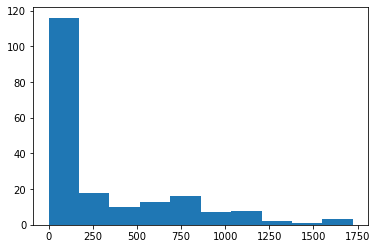

In [20]:
plt.hist(NG_new['Capacity_MW'],bins=10)
plt.show()

Nuclear plants are generally larger, for example the NuScale 12PK SMR Nuclear plant provides 720 MW (Gross) of power.  Consider that new natural gas plants that are 720 MW or greater would have
been an opportunity where a nuclear plant could have chosen instead (lost markety opportunity for nuclear).

In [63]:
NG_new[NG_new['Capacity_MW']>720]['Plant Name'].count()

34

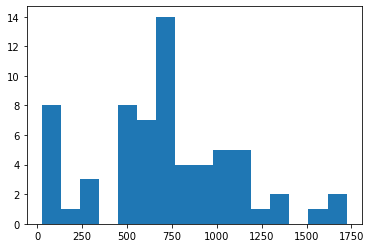

In [21]:
plt.hist(NG_new[NG_new['Technology']=='Natural Gas Fired Combined Cycle']['Capacity_MW'],bins=16)
plt.show()

In [22]:
NG_new_month.head(15)

,Date,Capacity_MW
0,2020-01-15,330.4
1,2020-02-15,1346.4
2,2020-03-15,1100.2
3,2020-04-15,1159.2
4,2020-05-15,1925.1
5,2020-06-15,122.5
6,2020-07-15,105.9
7,2020-08-15,42.3
0,2019-01-15,74.0
1,2019-02-15,24.3


In [23]:
NG_new_month.shape

(63, 2)

This period actually covers 68 months (1/2015-8/2020); there are 5 months which had no new NG plant construction (as shown
above, no plants in August 2019.  A straight average will over-estimate monthly construction.

In [24]:
NG_new_month['Capacity_MW'].mean()

914.8095238095239

In [40]:
NG_ave_month = NG_new_month['Capacity_MW'].sum()/68
NG_ave_month

847.5441176470589

In [27]:
nuclear_new = test[test['Technology']=='Nuclear']
nuclear_new 

,Year,Month,Plant Name,State,Plant_ID,Gen_ID,Capacity_MW,Technology,Energy Source Code,Date
270,2016,6,Watts Bar Nuclear Plant,TN,7722,2,1122.0,Nuclear,NUC,2016-06-15


In [42]:
AllSD = simple_process(shutdown_list)
nuclear_sd = AllSD[AllSD['Energy Source Code']=='NUC']
nuclear_sd

,Year,Month,Plant Name,State,Plant_ID,Gen_ID,Capacity_MW,Technology,Energy Source Code,Date
43,2020,4,Indian Point 2,NY,2497,2,1016.1,Nuclear,NUC,2020-04-15
78,2019,5,Pilgrim Nuclear Power Station,MA,1590,1,673.6,Nuclear,NUC,2019-05-15
167,2019,9,Three Mile Island,PA,8011,1,802.8,Nuclear,NUC,2019-09-15
133,2018,9,Oyster Creek,NJ,2388,1,607.7,Nuclear,NUC,2018-09-15
119,2016,10,Fort Calhoun,NE,2289,1,478.1,Nuclear,NUC,2016-10-15


In [29]:
def process_data_shutdown(file_list, tech):
    agg_dict = {'Date':"first",'State':"first",'Plant_ID':"first",'Capacity_MW':"sum", \
            'Technology':"first",'Energy Source Code':"first"}
    
    col_names = ['Year','Month','Ent_ID','Owner','Owner_type','Plant Name','State','Plant_ID','Gen_ID','Capacity_MW',\
         'Technology','Energy Source Code','Prime Mover']
    
    use = ['Year','Month','Plant Name','State','Plant_ID','Capacity_MW','Technology','Energy Source Code']
    
    f1= lambda x: datetime(int(x['Year']), int(x['Month']),15)
    
    init = pd.read_excel(file_list[0],skiprows=1,header=0, names=col_names)
    init = init[use]
    carry = init[init['Technology']==tech].copy()
    del init   
    carry['Date'] = carry.apply(f1,axis=1)
    carry['Capacity_MW'] = carry['Capacity_MW'].apply(obj_convert)
    out = carry.groupby("Plant Name",as_index=False).agg(agg_dict)
    out1 = carry.groupby("Date",as_index=False)['Capacity_MW'].sum()
    for i in range(1, len(file_list)):
        load = pd.read_excel(file_list[i],skiprows=1,header=0, names=col_names)
        load = load[use]
        s_load = load[load['Technology']==tech].copy()
        del load
        s_load['Date'] = s_load.apply(f1,axis=1)
        s_load['Capacity_MW'] = s_load['Capacity_MW'].apply(obj_convert)
        c_load = s_load.groupby("Plant Name",as_index=False).agg(agg_dict)
        c_load1 = s_load.groupby("Date",as_index=False)['Capacity_MW'].sum()
        out = pd.concat([out,c_load])
        out1 = pd.concat([out1,c_load1])
        del c_load, c_load1
    return out, out1


In [43]:
shutdown_coal, shutdown_coal_month = process_data_shutdown(shutdown_list, 'Conventional Steam Coal')
shutdown_coal.head()

,Plant Name,Date,State,Plant_ID,Capacity_MW,Technology,Energy Source Code
0,Asbury,2020-03-15,MO,2076.0,198.0,Conventional Steam Coal,SUB
1,Asheville,2020-01-15,NC,2706.0,378.0,Conventional Steam Coal,BIT
2,Colstrip,2020-01-15,MT,6076.0,614.0,Conventional Steam Coal,SUB
3,Colver Green Energy,2020-05-15,PA,10143.0,110.0,Conventional Steam Coal,WC
4,Conesville,2020-06-15,OH,2840.0,780.0,Conventional Steam Coal,BIT


153 coal plants have shutdown since the start of 2015.

In [44]:
shutdown_coal['Technology'].value_counts()

Conventional Steam Coal    153
Name: Technology, dtype: int64

In [45]:
shutdown_coal['Capacity_MW'].median(), shutdown_coal['Capacity_MW'].mean() 

(245.0, 381.28823529411756)

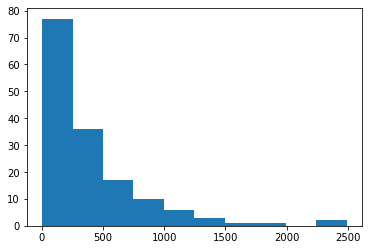

In [46]:
plt.hist(shutdown_coal['Capacity_MW'],bins=10)
plt.show()

The buildout of new natural gas capacity over this period has been almost exactly the same as the loss of coal capacity due to inactivations

In [47]:
NG_new['Capacity_MW'].sum()

57633.0

In [48]:
shutdown_coal['Capacity_MW'].sum()

58337.1

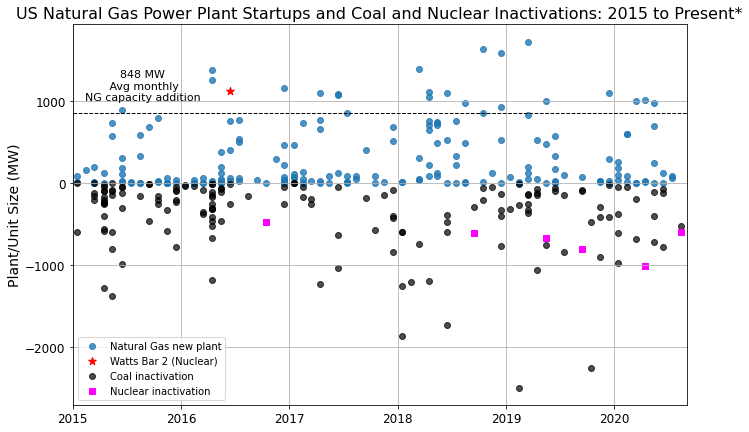

In [54]:
plt.figure(figsize=(11,7))
plt.xlim(datetime(2015,1,1), datetime(2020,9,1))
plt.title("US Natural Gas Power Plant Startups and Coal and Nuclear Inactivations: 2015 to Present*",fontsize=16)
plt.ylabel("Plant/Unit Size (MW)",fontsize=14)
plt.grid(b=True, which='major', axis='both')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.axhline(y =NG_ave_month, color='black', linewidth=1, linestyle='--')
plt.scatter(NG_new['Date'], NG_new['Capacity_MW'],label='Natural Gas new plant', alpha = 0.8)
plt.scatter(nuclear_new['Date'], nuclear_new['Capacity_MW'],s=66,label='Watts Bar 2 (Nuclear)', marker='*',color = 'red')
plt.scatter(shutdown_coal['Date'], -shutdown_coal['Capacity_MW'],color = 'black',alpha = 0.7, label='Coal inactivation')
plt.scatter(nuclear_sd['Date'], -nuclear_sd['Capacity_MW'],s=34,label='Nuclear inactivation', marker='s',color = 'magenta')
##Duane Arnold (nuclear) inactivation in Aug 2020 (not yet recorded in eia.gov data) manually added to plot
#https://en.wikipedia.org/wiki/Duane_Arnold_Energy_Center
plt.scatter(datetime(2020,8,15), -601,s=34, marker='s',color = 'magenta')
plt.legend(loc='lower left')
plt.annotate('          848 MW \n       Avg monthly \nNG capacity addition',xy=(0.02,0.80),\
             xytext=(0.02,0.80),xycoords='axes fraction',fontsize=11)
plt.show()

In [37]:
CC = NG_new[NG_new['Technology']=='Natural Gas Fired Combined Cycle']
CC.shape

(65, 7)

In [38]:
NG_other = NG_new[NG_new['Technology']!='Natural Gas Fired Combined Cycle']
NG_other.shape

(129, 7)

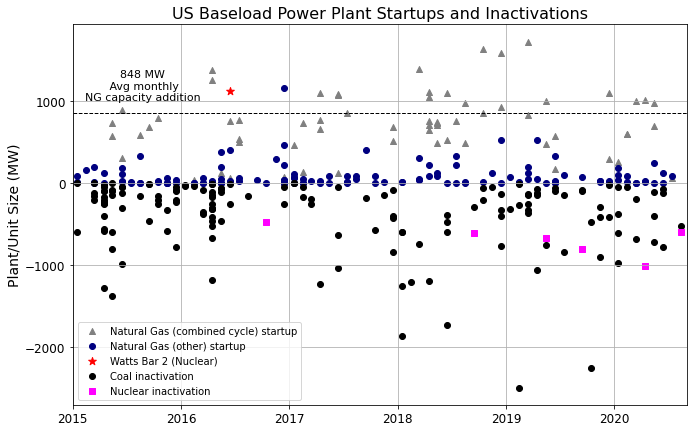

In [64]:
plt.figure(figsize=(11,7))
plt.xlim(datetime(2015,1,1), datetime(2020,9,1))
plt.title("US Baseload Power Plant Startups and Inactivations",fontsize=16)
plt.ylabel("Plant/Unit Size (MW)",fontsize=14)
plt.grid(b=True, which='major', axis='both')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.axhline(y =NG_ave_month, color='black', linewidth=1, linestyle='--')
plt.scatter(CC['Date'], CC['Capacity_MW'],label='Natural Gas (combined cycle) startup', color='gray',marker='^')
plt.scatter(NG_other['Date'], NG_other['Capacity_MW'],label='Natural Gas (other) startup',color='navy')
plt.scatter(nuclear_new['Date'], nuclear_new['Capacity_MW'],s=66,label='Watts Bar 2 (Nuclear)', marker='*',color = 'red')
plt.scatter(shutdown_coal['Date'], -shutdown_coal['Capacity_MW'],color = 'black',label='Coal inactivation')
plt.scatter(nuclear_sd['Date'], -nuclear_sd['Capacity_MW'],s=34,label='Nuclear inactivation', marker='s',color = 'magenta')
##Duane Arnold (nuclear) inactivation in Aug 2020 (not yet recorded in eia.gov data) manually added to plot
#https://en.wikipedia.org/wiki/Duane_Arnold_Energy_Center
plt.scatter(datetime(2020,8,15), -601,s=34, marker='s',color = 'magenta')
plt.legend(loc='lower left')
plt.annotate('          848 MW \n       Avg monthly \nNG capacity addition',xy=(0.02,0.80),\
             xytext=(0.02,0.80),xycoords='axes fraction',fontsize=11)
plt.show()